# Week7 - Tree Assignment

- Load the breast cancer dataset using datasets.load_breast_cancer()
- Use scatter plots to look at the data (use different colors for the classes)
- Use box plots to look at the data 
- create a training and test set with random_state = 3
- train a decision tree model on the training set.
- train a logistic regression model on the training set
- train a random forest model on the training set
- Which model performed better?
- Which features were most relevant in each model (a part from random forest)?
- Use grid search to improve performance on the best performed model

In [6]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
breast_cancer = load_breast_cancer()
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


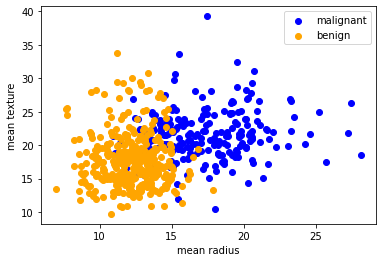

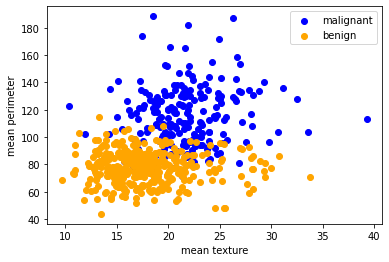

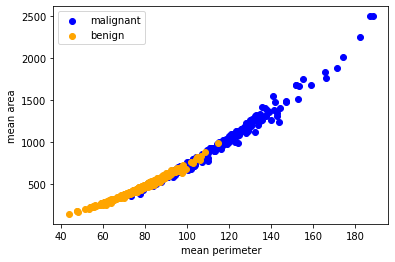

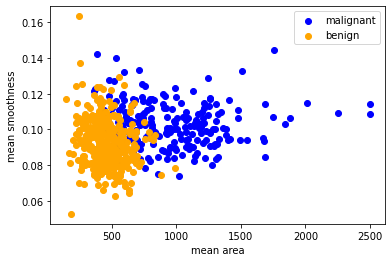

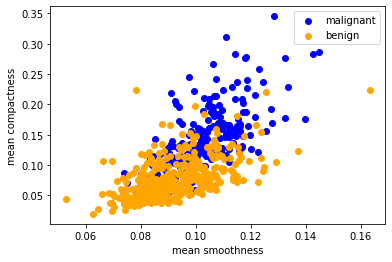

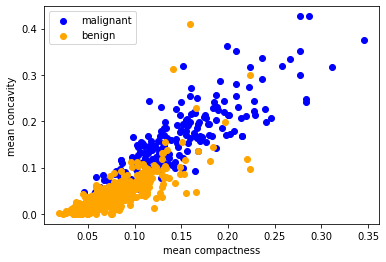

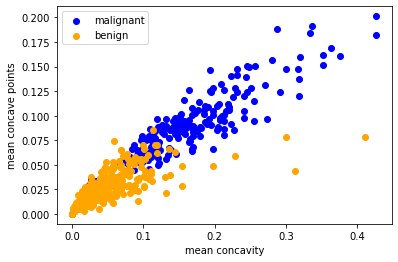

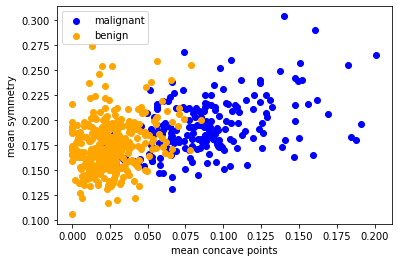

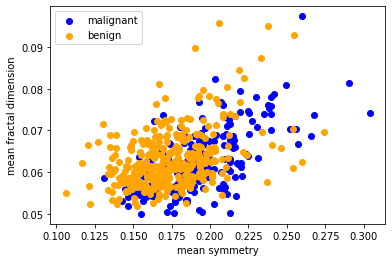

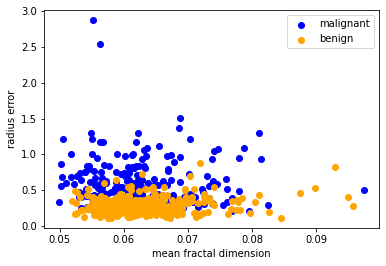

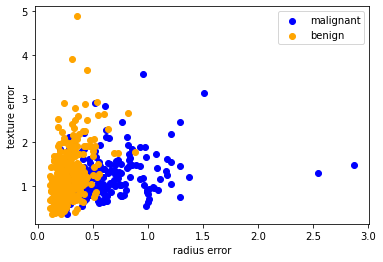

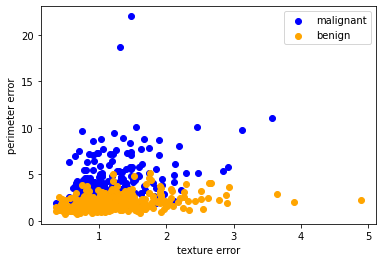

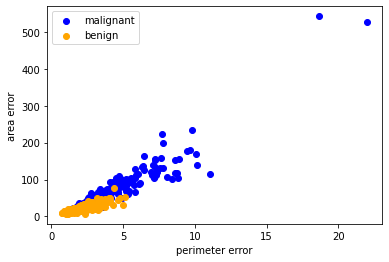

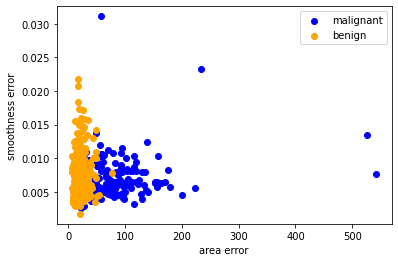

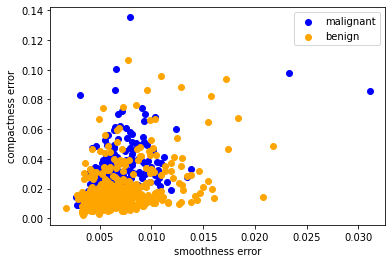

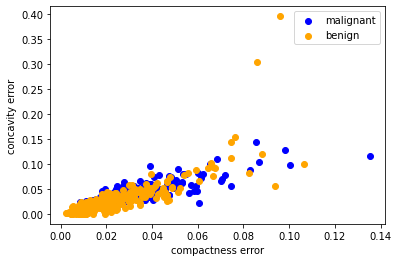

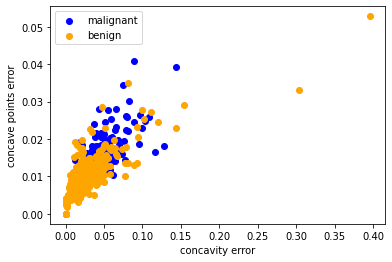

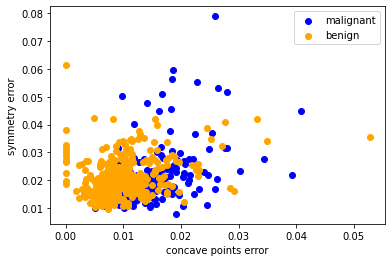

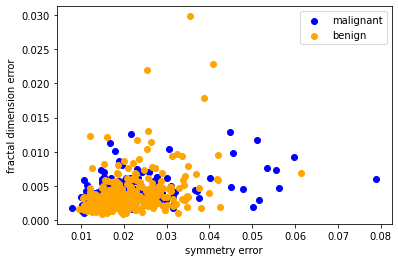

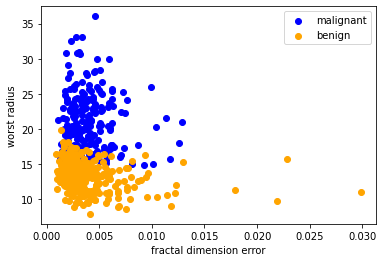

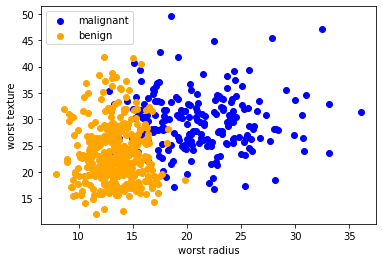

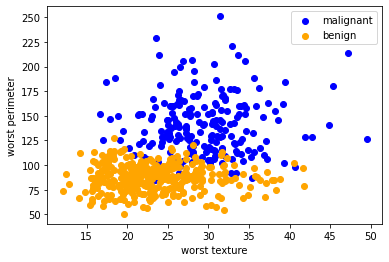

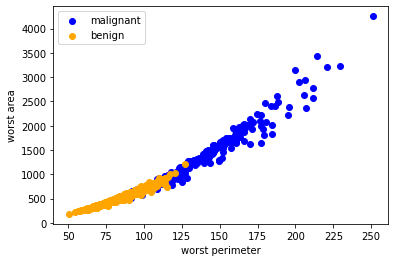

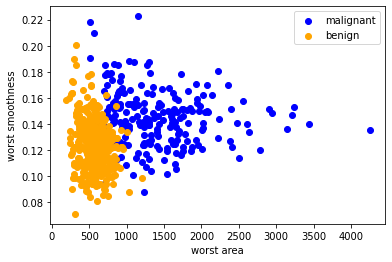

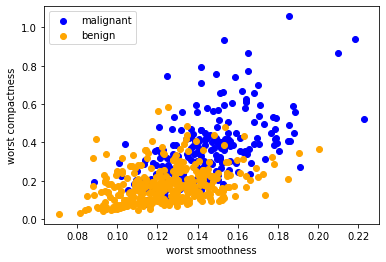

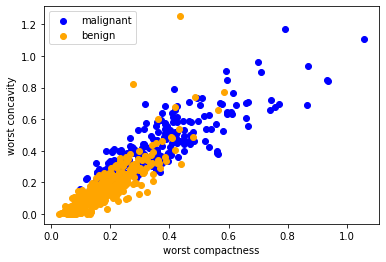

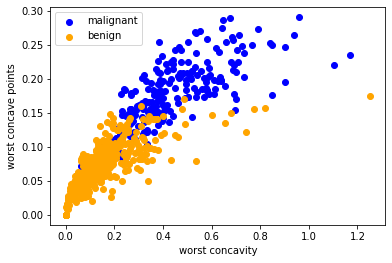

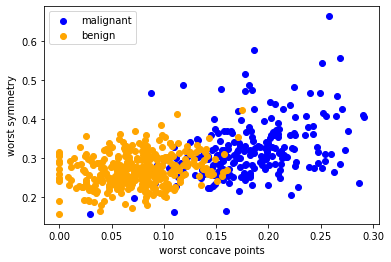

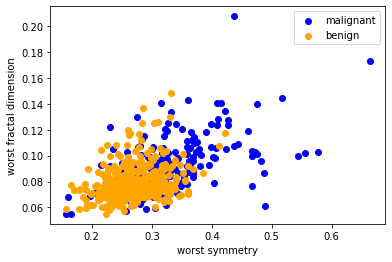

In [7]:
for i in range(breast_cancer.data.shape[1] - 1):
    plt.scatter(breast_cancer.data[breast_cancer.target==0, i], breast_cancer.data[breast_cancer.target==0, i+1], color='blue', label='malignant')
    plt.scatter(breast_cancer.data[breast_cancer.target==1, i], breast_cancer.data[breast_cancer.target==1, i+1], color='orange', label='benign')
    plt.xlabel(breast_cancer.feature_names[i])
    plt.ylabel(breast_cancer.feature_names[i+1])
    plt.legend()
    plt.show()

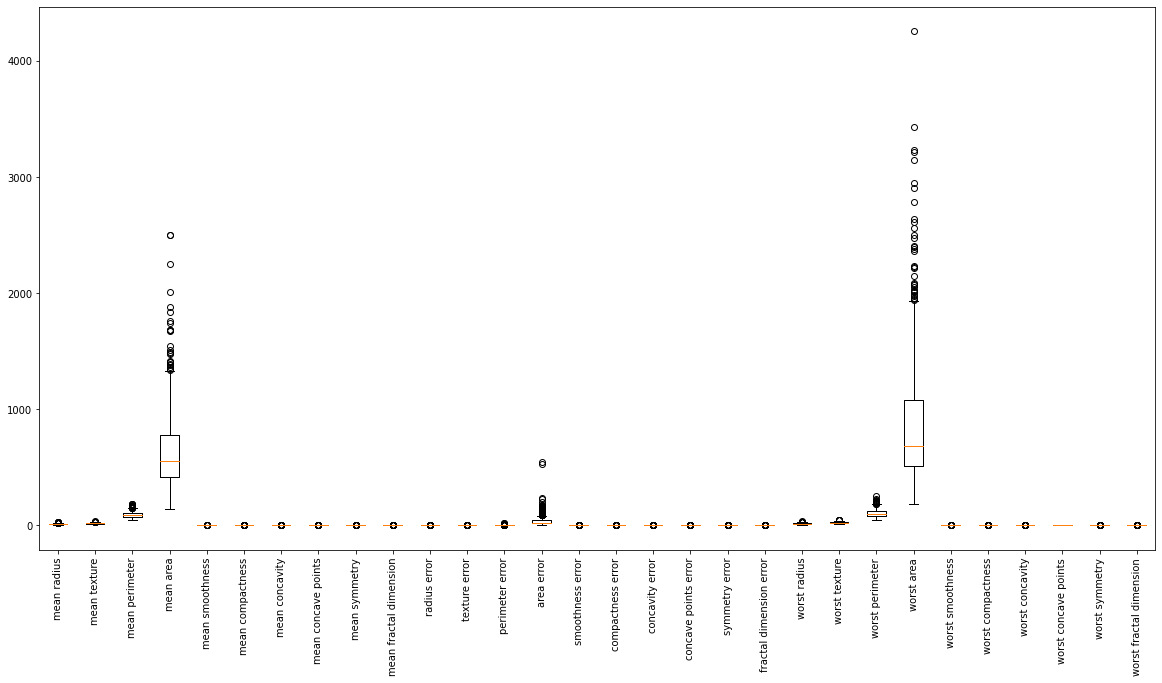

In [8]:
# create box plots for each feature
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot(breast_cancer.data, labels=breast_cancer.feature_names)
plt.xticks(rotation=90)
plt.show()

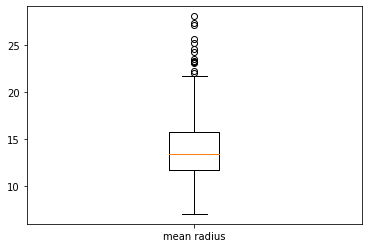

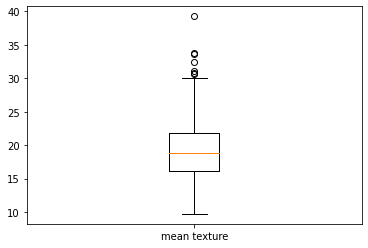

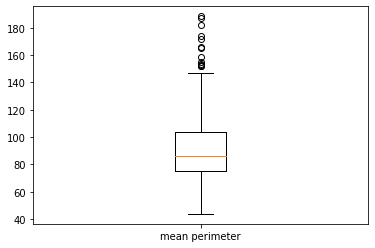

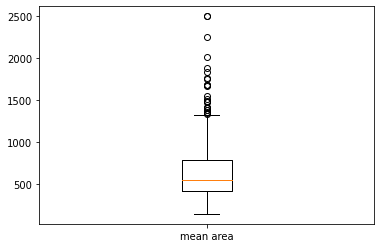

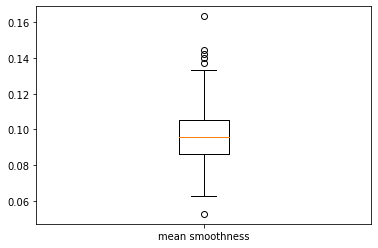

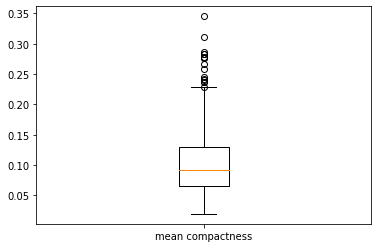

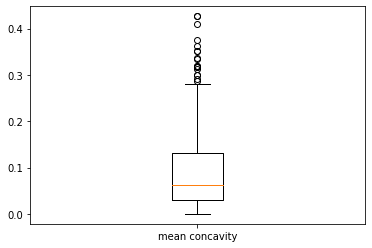

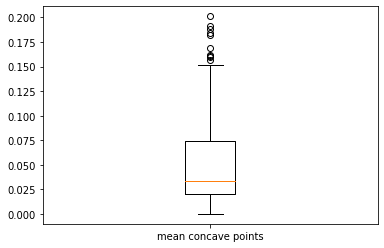

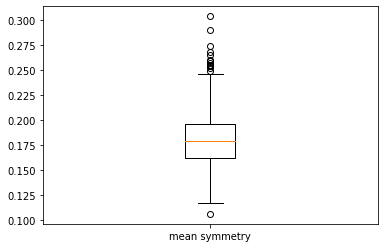

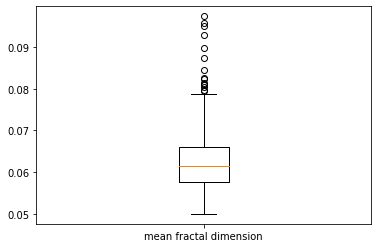

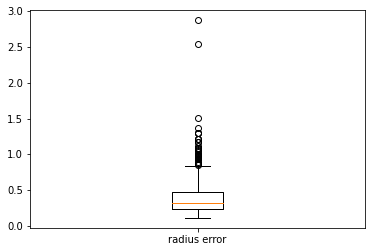

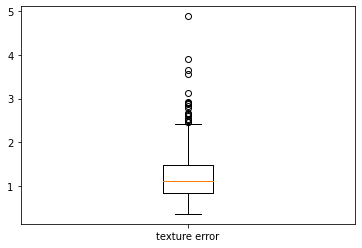

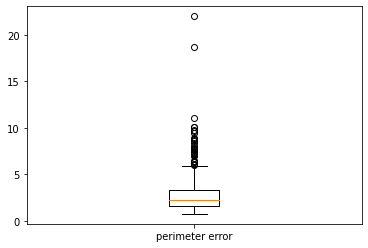

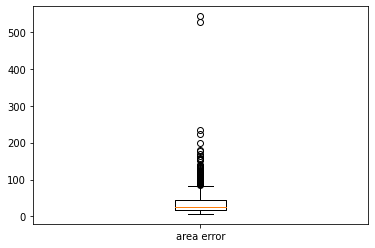

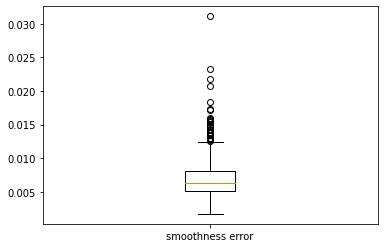

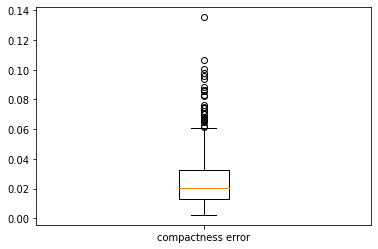

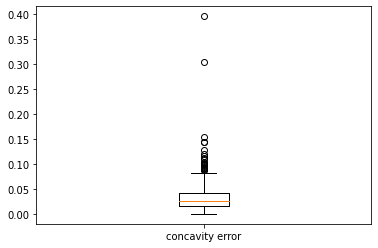

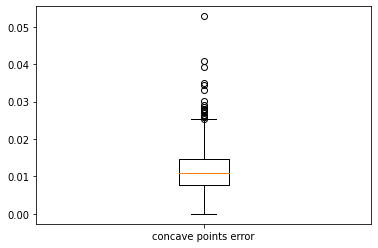

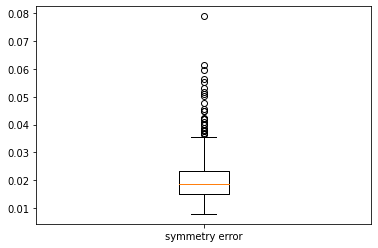

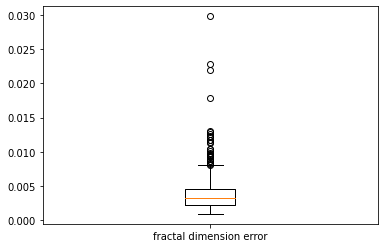

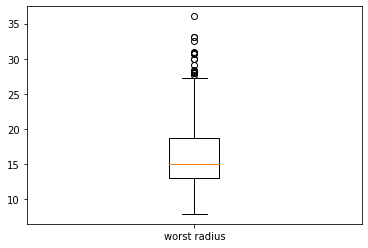

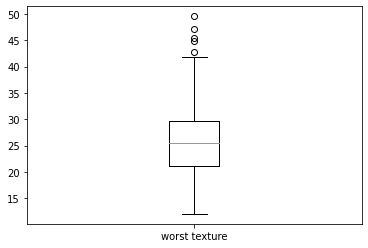

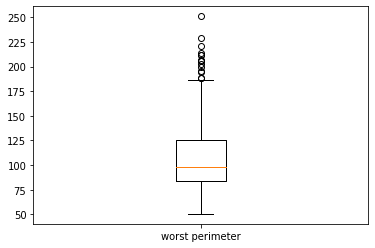

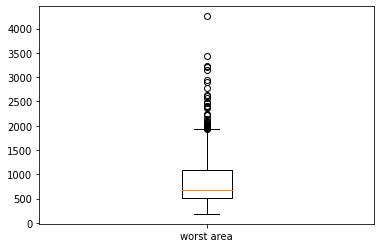

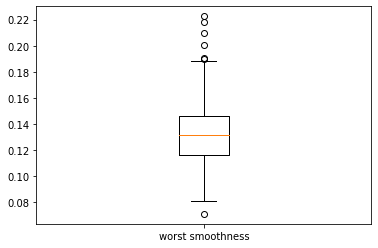

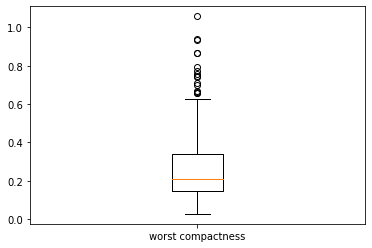

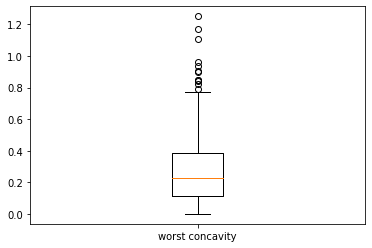

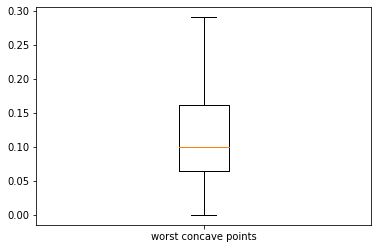

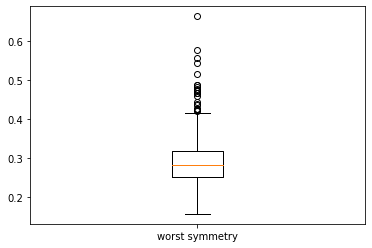

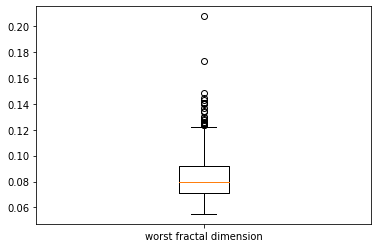

In [9]:
# create box plots for each feature
for col in df.columns:
    fig, ax = plt.subplots()
    ax.boxplot(df[col], labels=[col])
    plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=3)

In [14]:
dt_m = DecisionTreeClassifier(random_state=3)
dt_m.fit(X_train, y_train)

DecisionTreeClassifier(random_state=3)

In [15]:

dt_acc = dt_m.score(X_test, y_test)

print("Decision Tree Model Accuracy:", dt_acc)

Decision Tree Model Accuracy: 0.8947368421052632


In [17]:
lr_m = LogisticRegression(random_state=3)
lr_m.fit(X_train, y_train)
lr_acc= lr_m.score(X_test, y_test)
print("Logistic Regression Model Accuracy:", lr_acc)

Logistic Regression Model Accuracy: 0.9122807017543859


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:

rf_m = RandomForestClassifier(random_state=3)
rf_m.fit(X_train, y_train)
rf_acc = rf_m.score(X_test, y_test)

print("Random Forest Model Accuracy:", rf_acc)

Random Forest Model Accuracy: 0.9385964912280702


the random forest model performed the best with an accuracy of 0.9386 on the test set.

In [20]:
breast_cancer = load_breast_cancer()
X_df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y_series = pd.Series(breast_cancer.target)
dt_feature_imp = dt_m.feature_importances_
dt_feature_imp_df = pd.DataFrame({"Feature": X_df.columns,
                                          "Importance": dt_feature_imp})
dt_feature_imp_df = dt_feature_imp_df.sort_values("Importance", ascending=False)
print(dt_feature_imp_df)

                    Feature  Importance
27     worst concave points    0.707687
23               worst area    0.157173
1              mean texture    0.035092
13               area error    0.028189
26          worst concavity    0.017831
24         worst smoothness    0.011509
11            texture error    0.009157
22          worst perimeter    0.009103
4           mean smoothness    0.007790
28           worst symmetry    0.007523
18           symmetry error    0.004674
6            mean concavity    0.003725
21            worst texture    0.000548
20             worst radius    0.000000
0               mean radius    0.000000
25        worst compactness    0.000000
19  fractal dimension error    0.000000
15        compactness error    0.000000
17     concave points error    0.000000
16          concavity error    0.000000
14         smoothness error    0.000000
12          perimeter error    0.000000
10             radius error    0.000000
9    mean fractal dimension    0.000000


In [21]:
logreg_co = lr_m.coef_[0]
logreg_co_df = pd.DataFrame({"Feature": X_df.columns,
                                       "Coefficient": abs(logreg_co)})
logreg_co_df = logreg_co_df.sort_values("Coefficient", ascending=False)
print(logreg_co_df)

                    Feature  Coefficient
0               mean radius     0.685969
20             worst radius     0.675629
21            worst texture     0.642918
1              mean texture     0.639266
2            mean perimeter     0.471947
26          worst concavity     0.467186
25        worst compactness     0.372446
22          worst perimeter     0.275352
6            mean concavity     0.164888
11            texture error     0.156898
28           worst symmetry     0.144203
27     worst concave points     0.128254
13               area error     0.124380
5          mean compactness     0.115517
7       mean concave points     0.065434
12          perimeter error     0.048938
24         worst smoothness     0.048550
8             mean symmetry     0.046831
29  worst fractal dimension     0.036779
16          concavity error     0.033737
3                 mean area     0.027000
4           mean smoothness     0.025652
15        compactness error     0.024314
10             r

In [22]:
logreg_top = list(logreg_co_df.head(10)["Feature"])

In [23]:
dectree_top = list(dt_feature_imp_df.head(10)["Feature"])

In [25]:
common_features = set(dectree_top).intersection(logreg_top)
print(common_features)

{'worst perimeter', 'mean texture', 'texture error', 'worst concavity'}


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

rfc = RandomForestClassifier(random_state=3)
grid_search = GridSearchCV(
    estimator=rfc, 
    param_grid=param_grid, 
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test accuracy: ", accuracy)

Best parameters:  {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score:  0.9758241758241759
Test accuracy:  0.9298245614035088


From the grid search we obtained the best accuracy as 97%